In [ ]:
# The code below produces a plot of the symmetric Meixner Pollaczek Poisson flow as described in the paper:
# "Visualising the flows of orthogonal polynomial expansions of the Riemann Xi-function".
# The program reads the file with pre-computed coefficients and produces an implicit plot, 
# i.e. it visualises the flow of the real roots when r varies. 
# Version 1.0, 2 april 2024. 

The sum of all the coefficients is : 0.5000000000000000 = Xi(a*i) 

Ensure 20 digits accuracy at t = 60: 0.00000000000000000006 (should show 20 zeros)


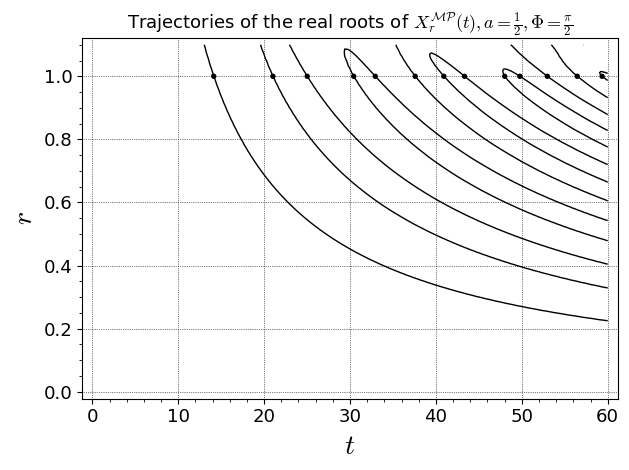

In [96]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
ord = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,1])

z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("MeixnerPollCoeffa12", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])
print("The sum of all the coefficients is : %3.16f = Xi(a*i) \n" % CoeffSum)

CCF=ComplexBallField(1024)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(t,a,n):
    f1=CCF(a,0)+I*CCF(t)
    hyp=CCF(2).hypergeometric([-n,f1],[a+a])
    return hyp

def MeixPollFlow(t,r):
    sum=CCF(0)
    for n in range(251):
        sum=sum+CCF(str(r),0).pow(n)*CCF(str(m1[n]))*hyp(t,CCF("0.5"),n) #ensure chose parameter a is set here
    return real_part(sum)

print("Ensure 20 digits accuracy at t = 60: %3.20f (should show 20 zeros)" % real_part(MeixPollFlow(60,1)-Xi(60)))

a1=implicit_plot(lambda t,r:((RDF(MeixPollFlow(t,r)))),(t,0,60),(r,0,1.1),color='black',fontsize=13,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title=r'Trajectories of the real roots of $X^{\mathcal{MP}}_r(t), a = \frac{1}{2}, \Phi = \frac{\pi}{2}$',gridlines=True,plot_points=150)
show(a1 + z,aspect_ratio='automatic')

The sum of all the coefficients is : 0.5087310387263240 = Xi(a*i) 

Ensure 20 digits accuracy at t = 60: -0.00000000000000000000 (should show 20 zeros)


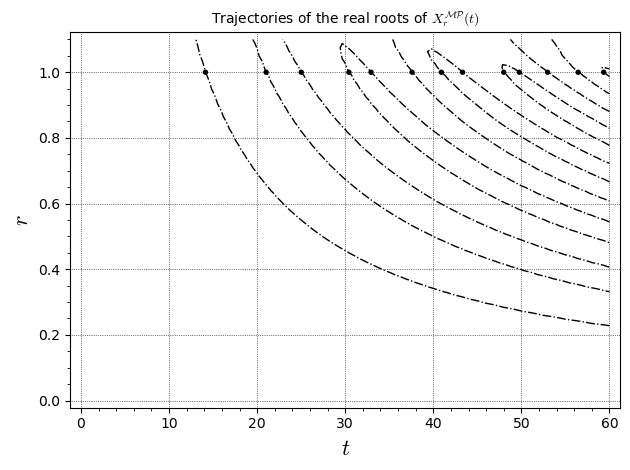

In [93]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
ord = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,1])

z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("MeixnerPollCoeffa1", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])
print("The sum of all the coefficients is : %3.16f = Xi(a*i) \n" % CoeffSum)

CCF=ComplexBallField(1024)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(t,a,n):
    f1=CCF(a,0)+I*CCF(t)
    hyp=CCF(2).hypergeometric([-n,f1],[a+a])
    return hyp

def MeixPollFlow(t,r):
    sum=CCF(0)
    for n in range(251):
        sum=sum+CCF(str(r),0).pow(n)*CCF(str(m1[n]))*hyp(t,CCF("1"),n) #ensure chose parameter a is set here
    return real_part(sum)

print("Ensure 20 digits accuracy at t = 60: %3.20f (should show 20 zeros)" % real_part(MeixPollFlow(60,1)-Xi(60)))

a2=implicit_plot(lambda t,r:((RDF(MeixPollFlow(t,r)))),(t,0,60),(r,0,1.1),color='black',linestyle ="dashdot",linewidth=1,axes_labels=['$t$','$r$'],title=r'Trajectories of the real roots of $X^{\mathcal{MP}}_r(t)$',gridlines=True,plot_points=90)
show(a2 + z,aspect_ratio='automatic')

The sum of all the coefficients is : 1.0104492672326733 = 2ˆ(1-2*a)*2/a*sinh(a/2) 

Ensure 20 digits accuracy at t = 60: 0.00000000000000000000 (should show 20 zeros)


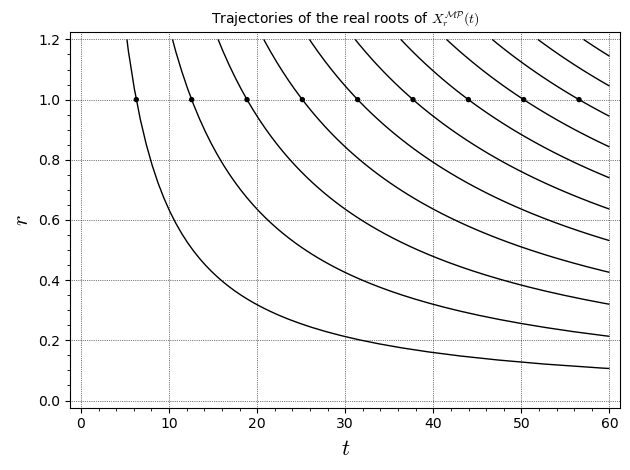

In [71]:
var("r","t");

#Generate a plot of all ordinates of the zeros < 60 to overlay the flow graphs
var('y')
ord = []
for y in range(9):
    ord.append([2*pi()*(y+1),1])
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("MeixnerPollCoeffa12int", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])
print("The sum of all the coefficients is : %3.16f = 2/a*sinh(a/2) \n" % CoeffSum)

CCF=ComplexBallField(1024)
def Xin(t):
    Xin=2*CCF(t/2).sin()/CCF(t)
    return Xin

def hyp(t,a,n):
    f1=CCF(a,0)+I*CCF(t)
    hyp=CCF(2).hypergeometric([-n,f1],[a+a])
    return hyp

def MeixPollFlow(t,r):
    sum=CCF(0)
    for n in range(201):
        sum=sum+CCF(str(r),0).pow(n)*CCF(str(m1[n]))*hyp(t,CCF("0.5"),n) #ensure chose parameter a is set here
    return real_part(sum)

print("Ensure 20 digits accuracy at t = 60: %3.20f (should show 20 zeros)" % real_part(MeixPollFlow(60,1)-Xin(60)))

a1i=implicit_plot(lambda t,r:((RDF(MeixPollFlow(t,r)))),(t,0,60),(r,0,1.2),color='black',linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title=r'Trajectories of the real roots of $X^{\mathcal{MP}}_r(t)$',gridlines=True,plot_points=90)
show(a1i + z,aspect_ratio='automatic')

The sum of all the coefficients is : 1.0421906109874948 = 2/a*sinh(a/2) 

Ensure 20 digits accuracy at t = 60: -0.00000000000000000000 (should show 20 zeros)


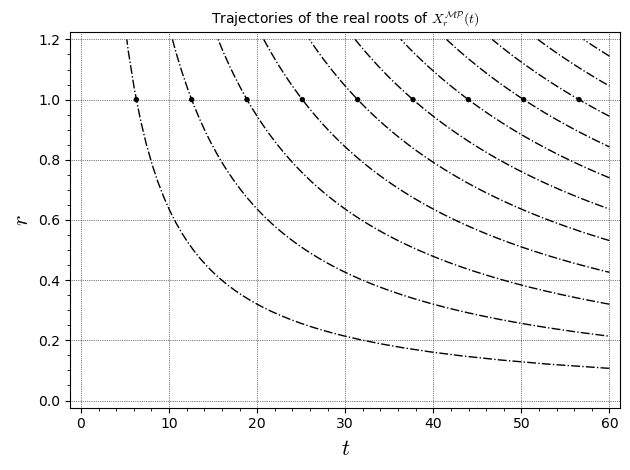

In [91]:
var("r","t");

#Generate a plot of all ordinates of the zeros < 60 to overlay the flow graphs
var('y')
ord = []
for y in range(9):
    ord.append([2*pi()*(y+1),1])
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("MeixnerPollCoeffa1int", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])
print("The sum of all the coefficients is : %3.16f = 2/a*sinh(a/2) \n" % CoeffSum)

CCF=ComplexBallField(1024)
def Xin(t):
    Xin=2*CCF(t/2).sin()/CCF(t)
    return Xin

def hyp(t,a,n):
    f1=CCF(a,0)+I*CCF(t)
    hyp=CCF(2).hypergeometric([-n,f1],[a+a])
    return hyp

def MeixPollFlow(t,r):
    sum=CCF(0)
    for n in range(101):
        sum=sum+CCF(str(r),0).pow(n)*CCF(str(m1[n]))*hyp(t,CCF("1"),n) #ensure chose parameter a is set here
    return real_part(sum)

print("Ensure 20 digits accuracy at t = 60: %3.20f (should show 20 zeros)" % real_part(MeixPollFlow(60,1)-Xin(60)))

a2i =implicit_plot(lambda t,r:((RDF(MeixPollFlow(t,r)))),(t,0,60),(r,0,1.2),color='black',linestyle ="dashdot",linewidth=1,axes_labels=['$t$','$r$'],title=r'Trajectories of the real roots of $X^{\mathcal{MP}}_r(t)$',gridlines=True,plot_points=90)
show(a2i + z,aspect_ratio='automatic')

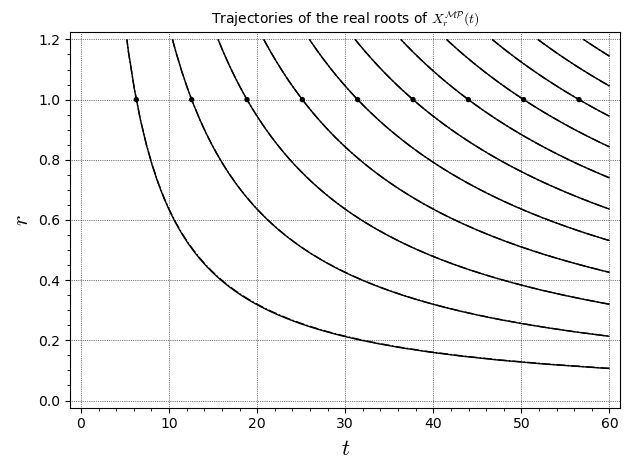

In [92]:
show(a1i + a2i + z,aspect_ratio='automatic')